# Importing Libraries & datasets

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel("../final_df.xlsx")


# Exploratory Data Analysis

### Correlation Heatmap

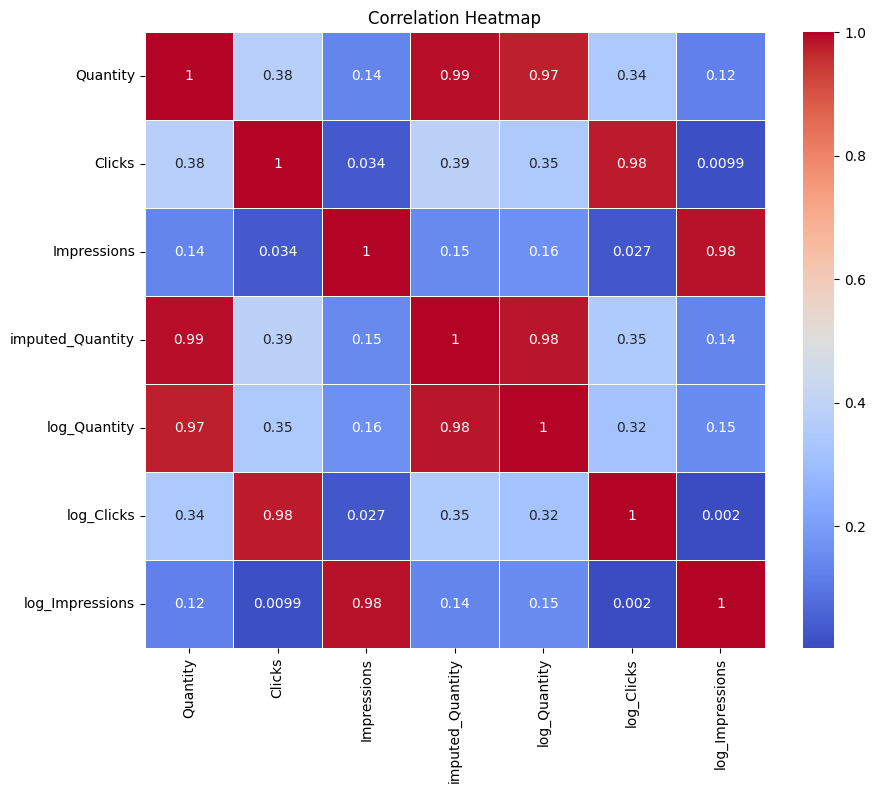

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

Through the above correlation heatmap, we can say that :
* Clicks have good correlation with Quantity
* Impressions also have slight relation to Quantity
* Impression have very tiny relation to clicks


### 1. How Clicks affect the Product's quantity?

<i>Function for plotting Linear Regression

In [4]:
# Define function for plotting regression
def plot_regression(df, x_col, y_col, title, ax):
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values
    
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    slope = model.coef_[0]
    
    ax.scatter(df[x_col], df[y_col], label='Actual Data')
    ax.plot(df[x_col], y_pred, color='red', label='Regression Line')
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.legend()
    return slope

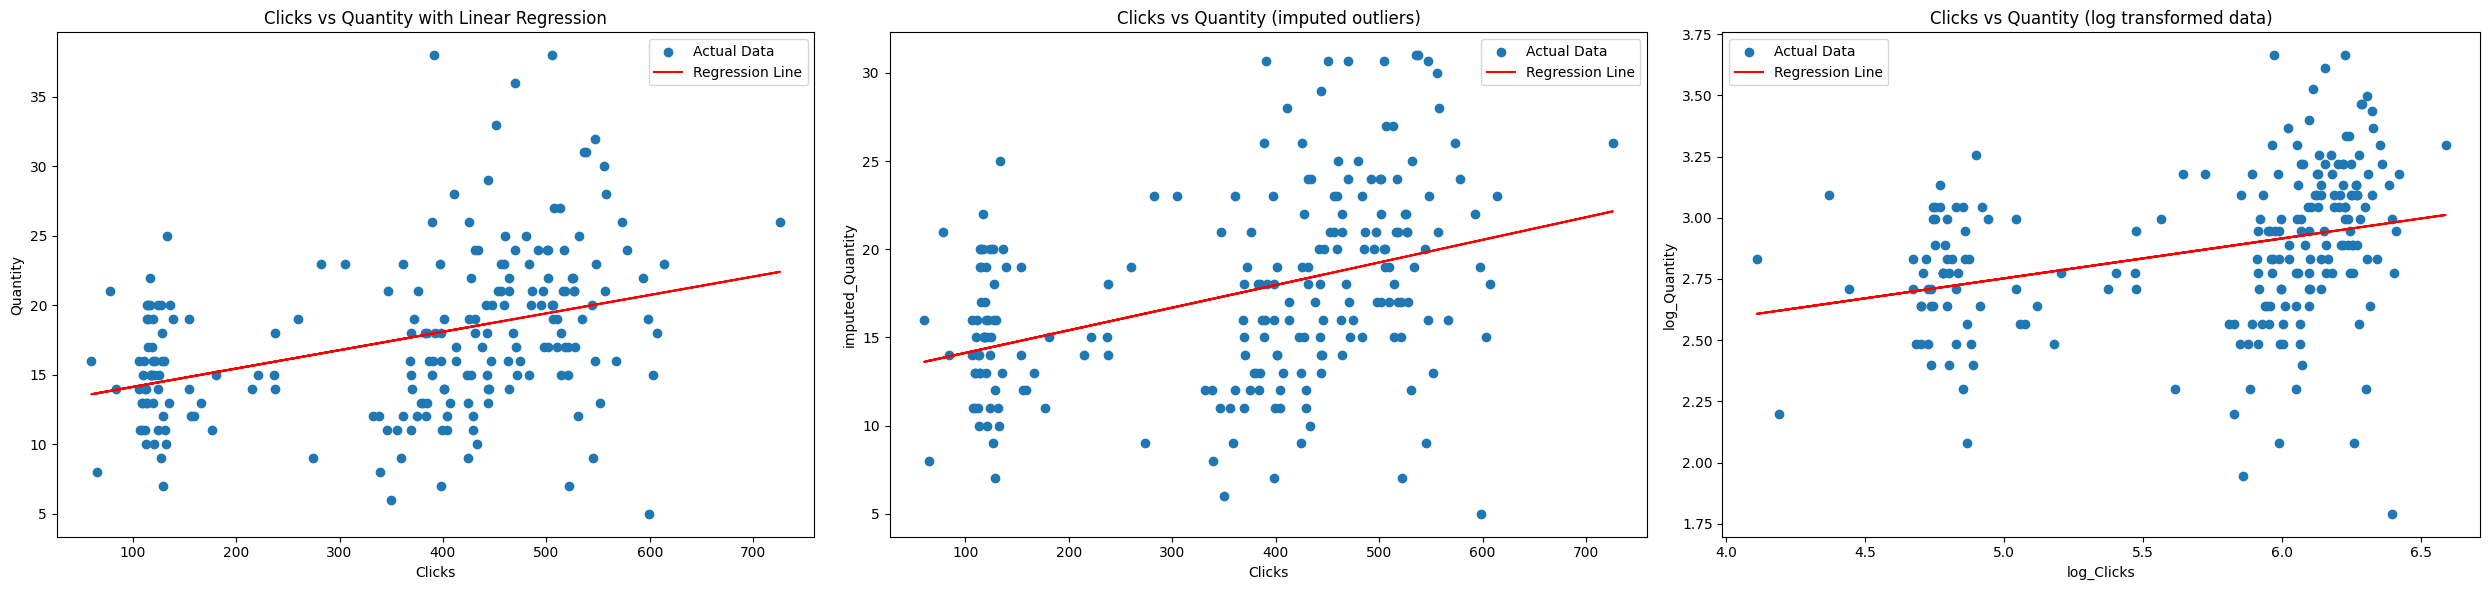

The slope of the linear regression model for original data is: 0.013234961483654805
The slope of the linear regression model for data with imputed outliers is: 0.012818303346978916
The slope of the linear regression model for log transformed data is: 0.16298656613150667


In [5]:
# Create subplots for plotting
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting regression for different scenarios
slope_original = plot_regression(df, 'Clicks', 'Quantity', 'Clicks vs Quantity with Linear Regression', axes[0])
imputed_slope = plot_regression(df, 'Clicks', 'imputed_Quantity', 'Clicks vs Quantity (imputed outliers)', axes[1])
slope_log = plot_regression(df, 'log_Clicks', 'log_Quantity', 'Clicks vs Quantity (log transformed data)', axes[2])

plt.tight_layout()
plt.show()

# Print slopes
print(f"The slope of the linear regression model for original data is: {slope_original}")
print(f"The slope of the linear regression model for data with imputed outliers is: {imputed_slope}")
print(f"The slope of the linear regression model for log transformed data is: {slope_log}")

Hence, there is a relation with +ve slope, i.e. Quantity increases as Clicks increases.
***

### 2. How Impressions affect the Product's quantity?

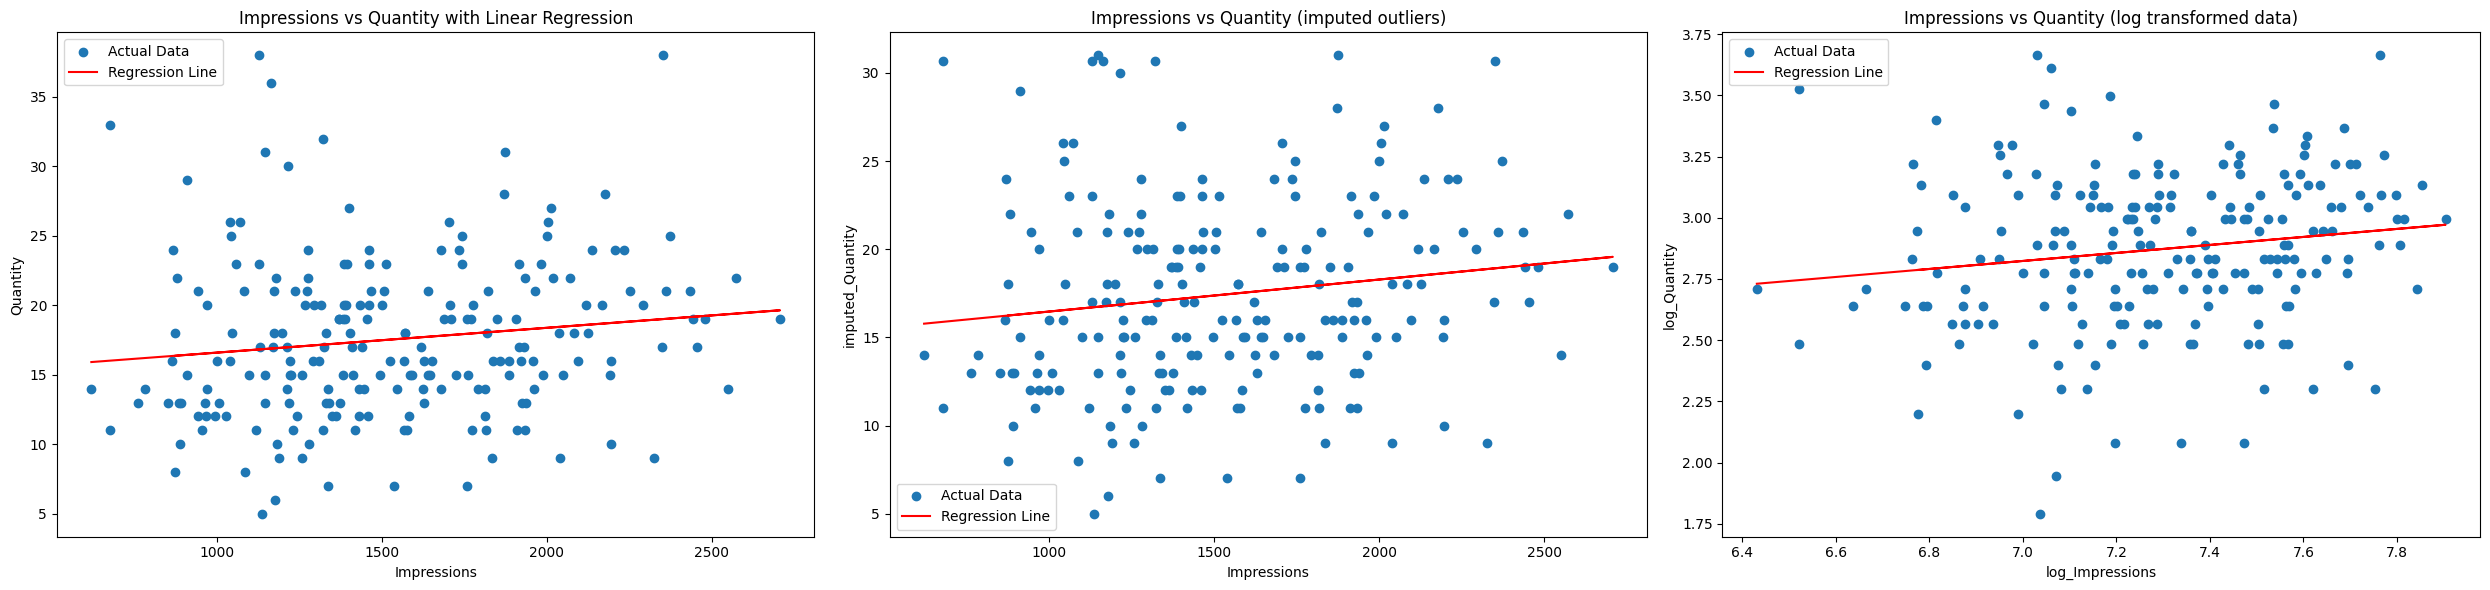

The slope of the linear regression model for original data is: 0.0017863293104571235
The slope of the linear regression model for data with imputed outliers is: 0.0018151514524222265
The slope of the linear regression model for log transformed data is: 0.16352913564679322


In [6]:
# Create subplots for plotting
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting regression for different scenarios
slope_original = plot_regression(df, 'Impressions', 'Quantity', 'Impressions vs Quantity with Linear Regression', axes[0])
imputed_slope = plot_regression(df, 'Impressions', 'imputed_Quantity', 'Impressions vs Quantity (imputed outliers)', axes[1])
slope_log = plot_regression(df, 'log_Impressions', 'log_Quantity', 'Impressions vs Quantity (log transformed data)', axes[2])

plt.tight_layout()
plt.show()

# Print slopes
print(f"The slope of the linear regression model for original data is: {slope_original}")
print(f"The slope of the linear regression model for data with imputed outliers is: {imputed_slope}")
print(f"The slope of the linear regression model for log transformed data is: {slope_log}")

Hence, there is a +ve slope that means an increase in impressions can slightly increase the quantity demanded.
***

### 3. Does more impressions lead to more clicks?

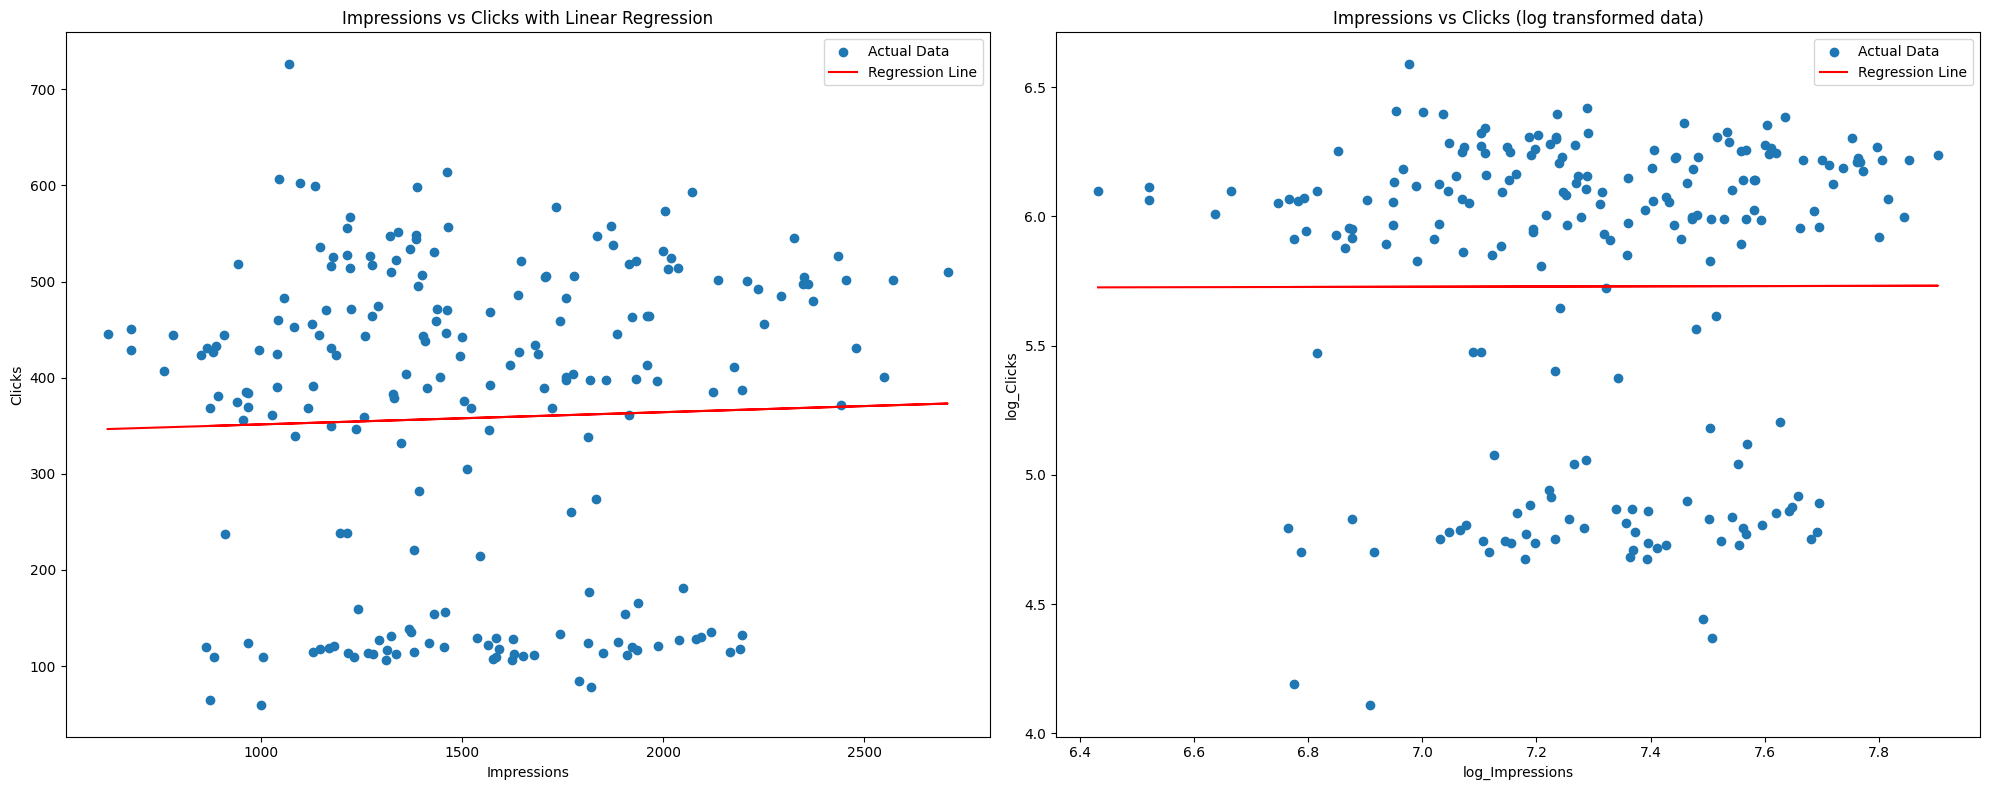

The slope of the linear regression model for original data is: 0.012709310479620622
The slope of the linear regression model for log transformed data is: 0.004241626376528985


In [7]:
# Create subplots for plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting regression for different scenarios
slope_original = plot_regression(df, 'Impressions', 'Clicks', 'Impressions vs Clicks with Linear Regression', axes[0])
slope_log = plot_regression(df, 'log_Impressions', 'log_Clicks', 'Impressions vs Clicks (log transformed data)', axes[1])

plt.tight_layout()
plt.show()

# Print slopes
print(f"The slope of the linear regression model for original data is: {slope_original}")
print(f"The slope of the linear regression model for log transformed data is: {slope_log}")

Hence the slope is +ve and thus proves the hypothesis that More impressions leads to more clicks.
***

### 4. Day wise plot for all 7 month data

#### 4.1 For Quantity

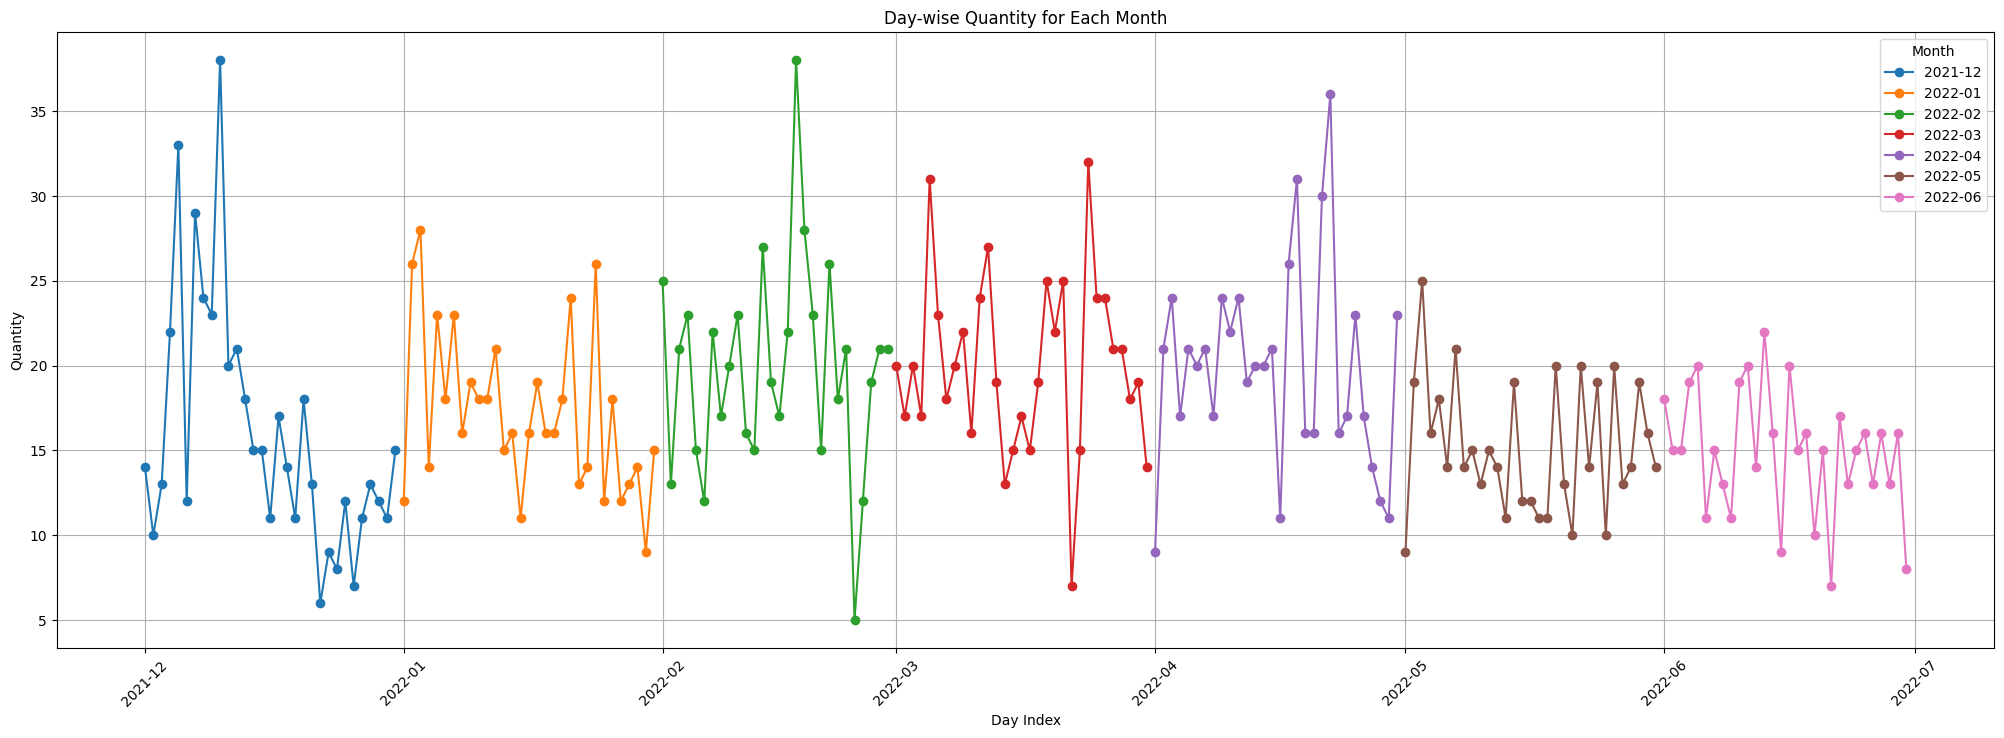

In [8]:
# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Quantity'], marker='o', linestyle='-', label=str(month))

# Add title and labels
plt.title('Day-wise Quantity for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


There are more peaks in the month of december, march, april and may.

#### 4.2 For Clicks

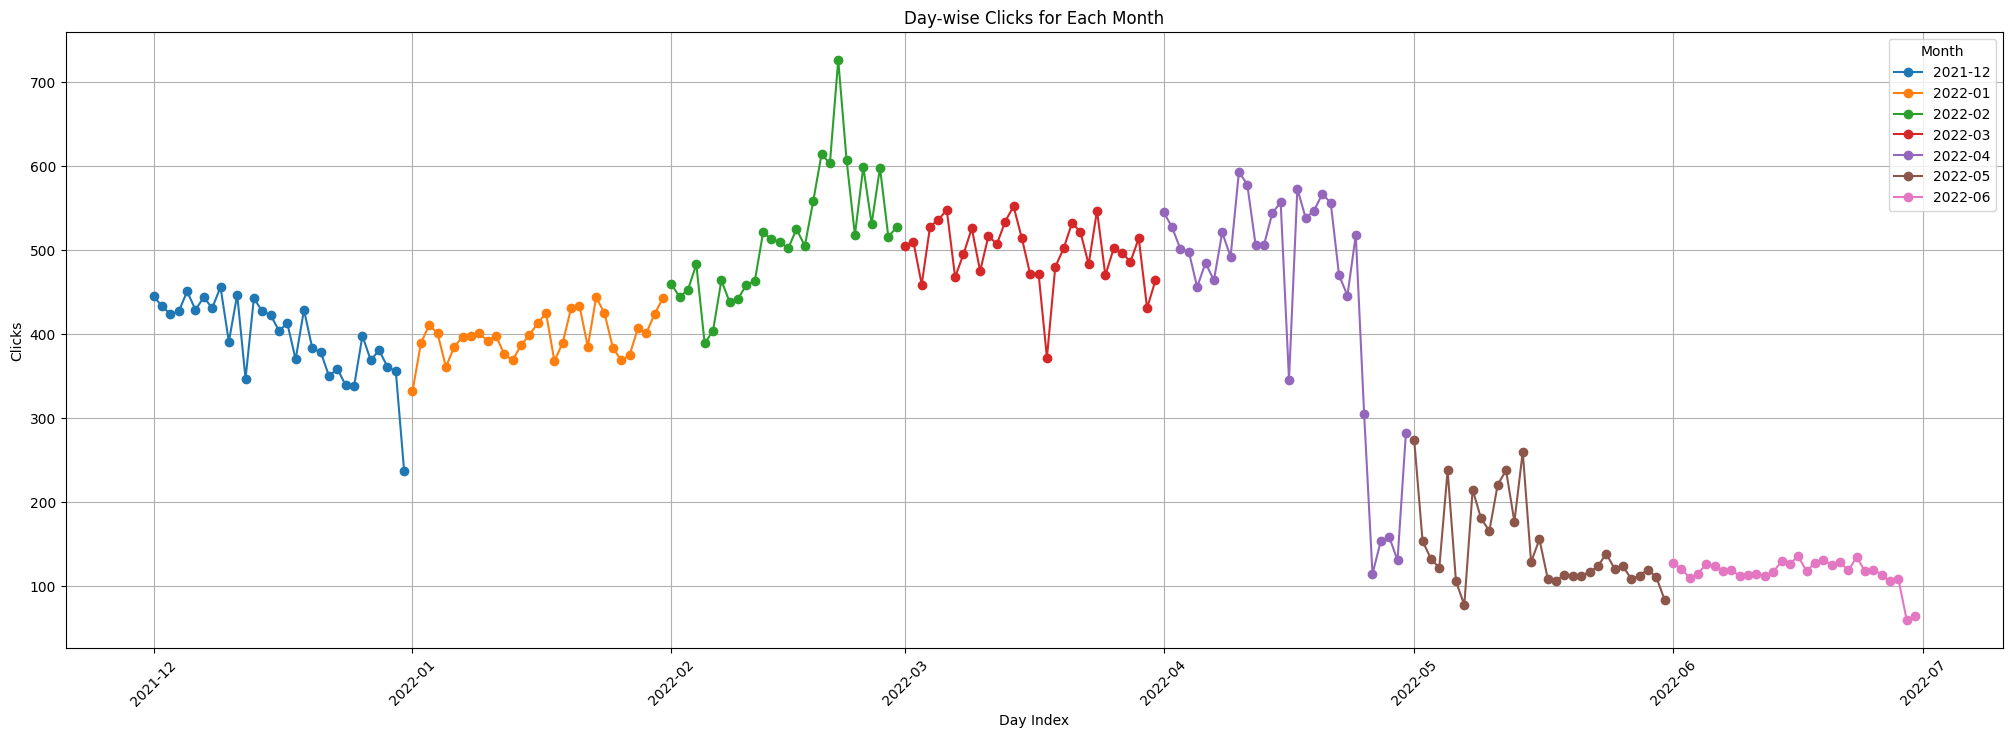

In [9]:
# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Clicks'], marker='o', linestyle='-', label=str(month))

# Add title and labels
plt.title('Day-wise Clicks for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


Month of May and June have loswest Clicks, while februaury has highest peak

#### 4.3 For Impressions

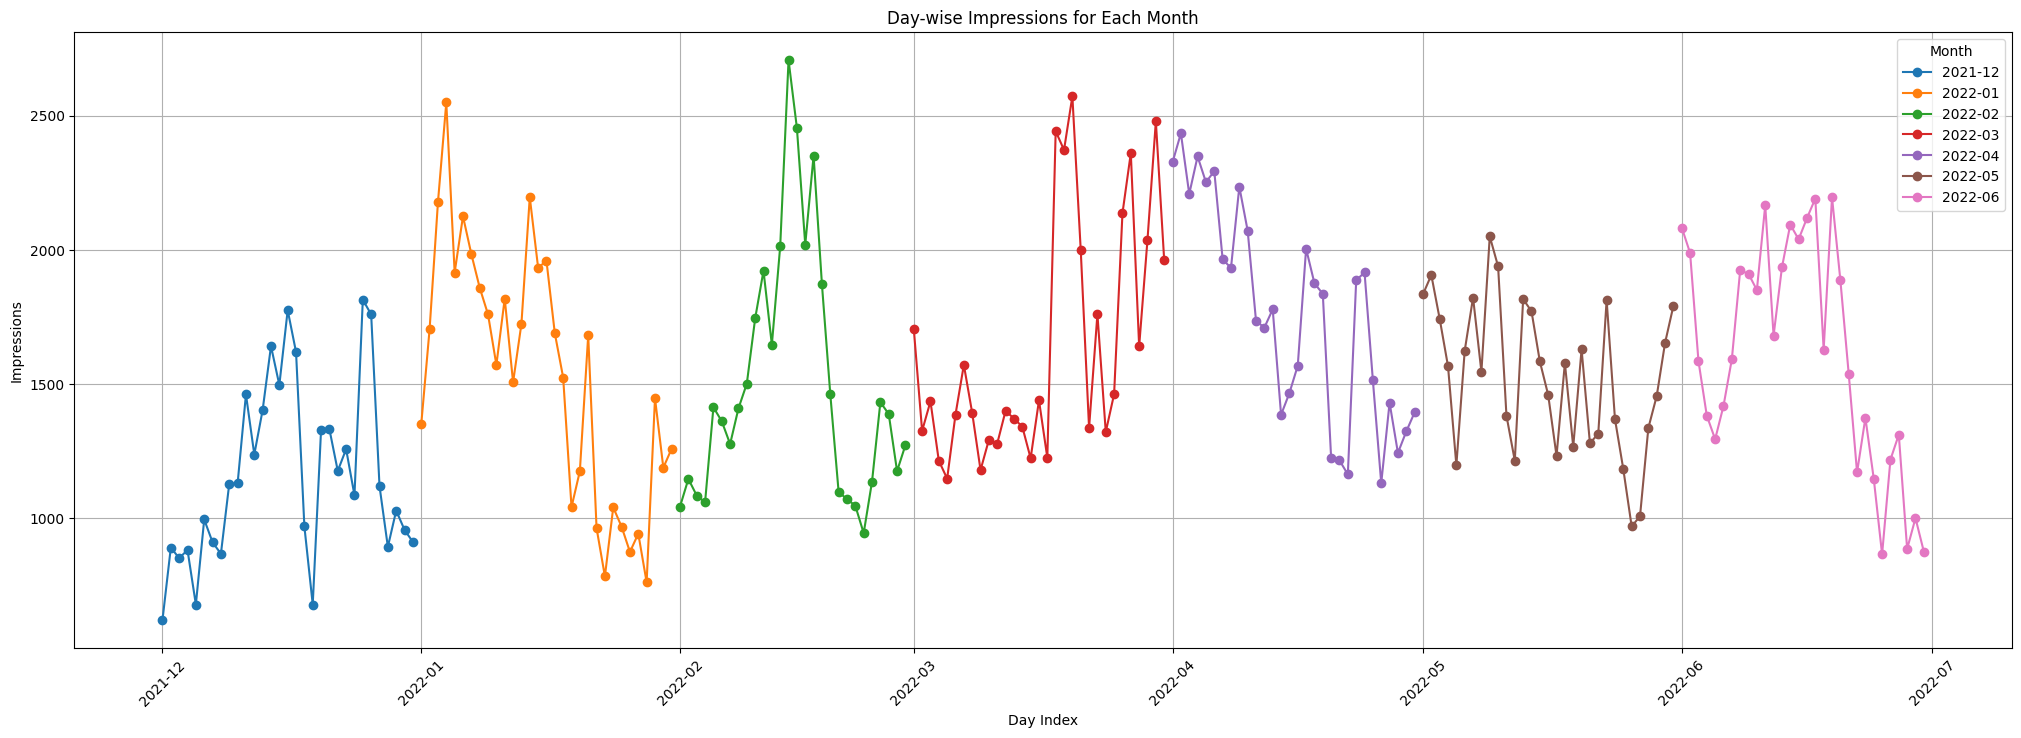

In [10]:
# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Impressions'], marker='o', linestyle='-', label=str(month))

# Add title and labels
plt.title('Day-wise Impressions for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


Highest peak of impressions is in the month of March, followed by February and april.

### 5. Monthly plot

#### 5.1 For quantity

In [11]:
def annotate_points(ax, x, y, values):
    for i, txt in enumerate(values):
        ax.annotate(f'{txt:.0f}', (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center')

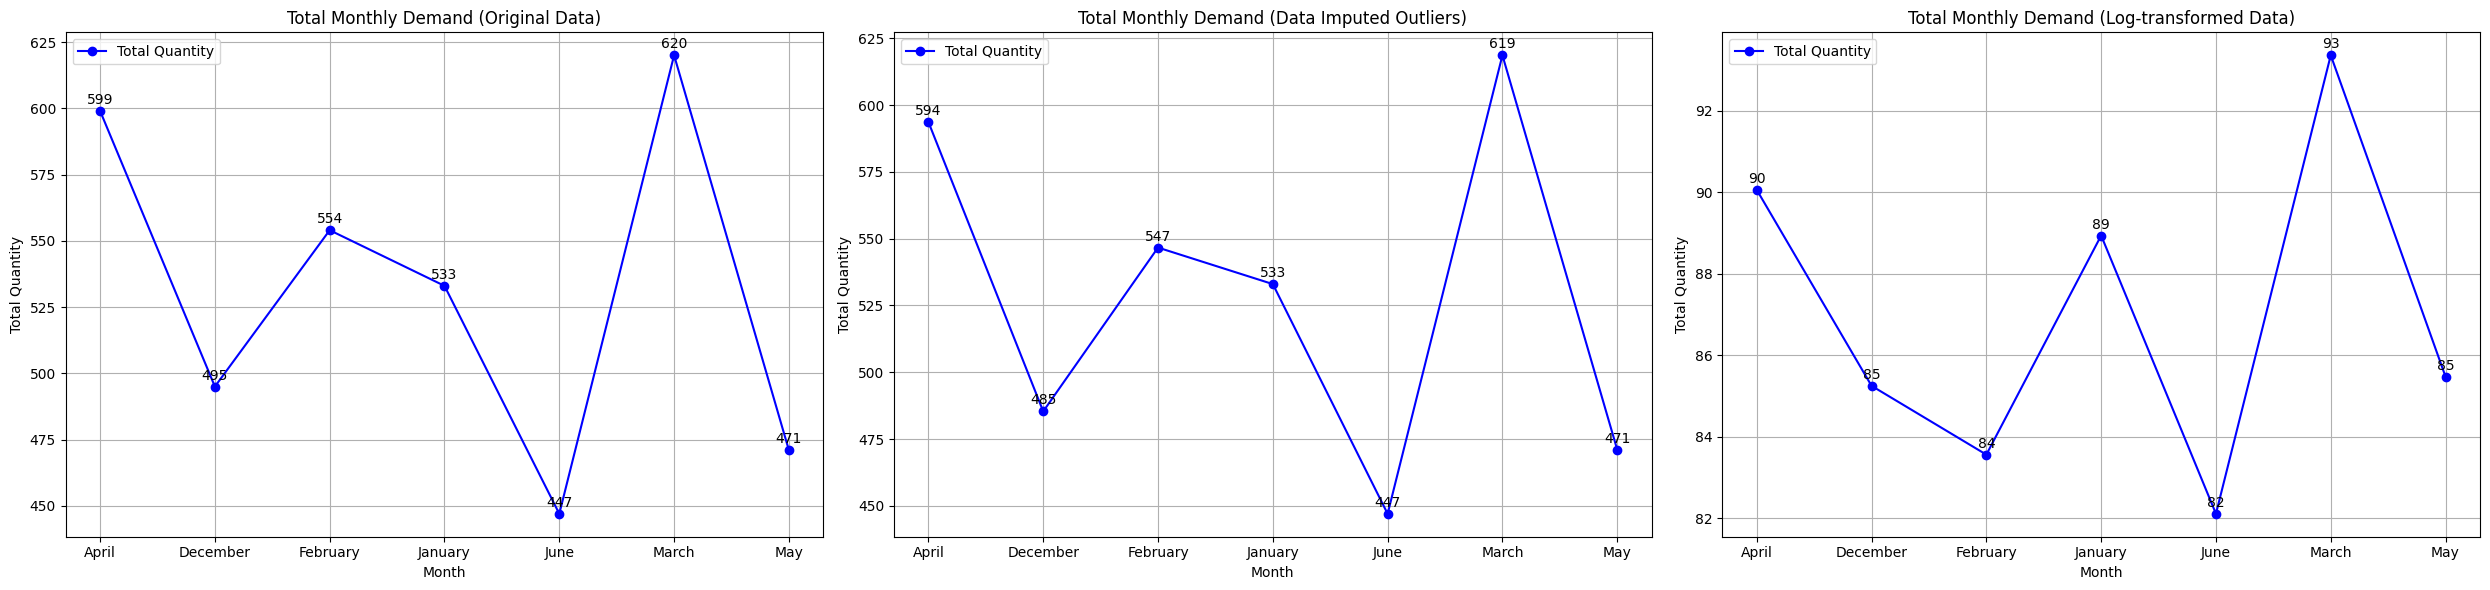

In [12]:
def plot_monthly_demand(df, x_col, y_col, title, ax):
    df1 = df.groupby(x_col)[y_col].sum().reset_index()
    df1 = df1.sort_values(by=x_col)
    ax.plot(df1[x_col], df1[y_col], marker='o', color='blue', label='Total Quantity')
    annotate_points(ax, df1[x_col], df1[y_col], df1[y_col])
    del df1
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Quantity')
    ax.grid(True)
    ax.legend()

# Plotting side by side
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

plot_monthly_demand(df, 'MonthName', 'Quantity', 'Total Monthly Demand (Original Data)', axes[0])
plot_monthly_demand(df, 'MonthName', 'imputed_Quantity', 'Total Monthly Demand (Data Imputed Outliers)', axes[1])
plot_monthly_demand(df, 'MonthName', 'log_Quantity', 'Total Monthly Demand (Log-transformed Data)', axes[2])

plt.tight_layout()
plt.show()

* Hence, the total quantity demanded of Product A increases as winters arrive and reaches its peak in March and then declines rapidly.
* Peak 1 --> March (03-2022)
* Peak 2 --> April (04-2022)
***

#### 5.2 For quantity, clicks and impressions aggregated plot

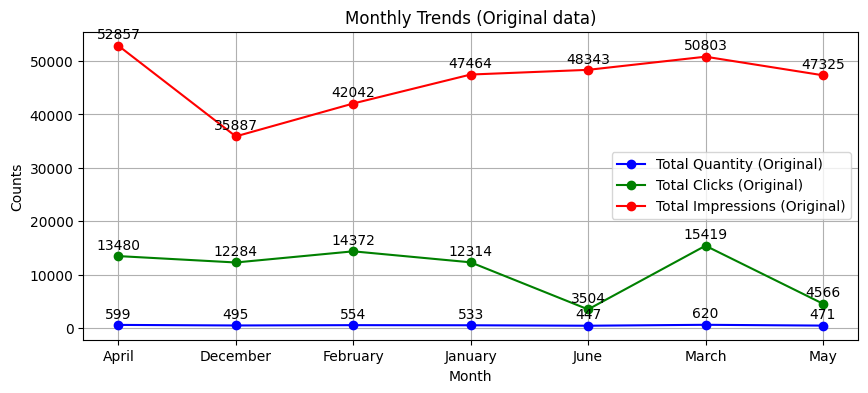

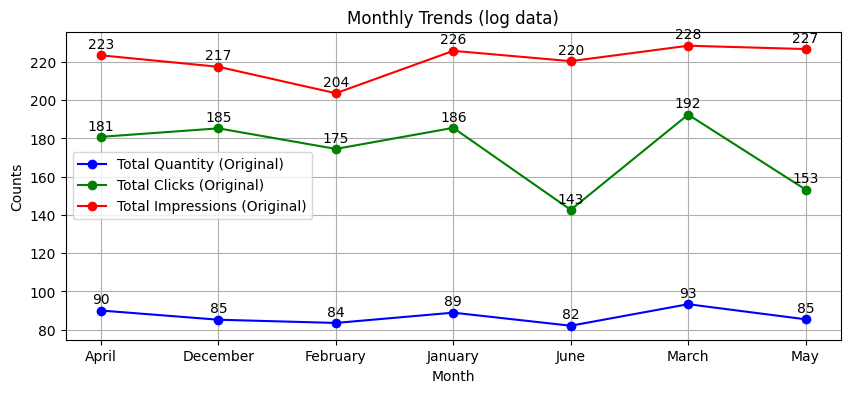

In [13]:
def plot_aggregated_monthly(df, x_col, y_cols, colors, labels, title):
    plt.figure(figsize=(10, 4))
    ax = plt.gca()
    for y_col, color, label in zip(y_cols, colors, labels):
        df1 = df.groupby(x_col)[y_col].sum().reset_index()
        df1 = df1.sort_values(by=x_col)
        plt.plot(df1[x_col], df1[y_col], marker='o', color=color, label=label)
        annotate_points(ax, df1[x_col], df1[y_col], df1[y_col])
        del df1

    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Counts')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_aggregated_monthly(df, 'MonthName', ['Quantity', 'Clicks', 'Impressions'], ['blue', 'green', 'red'], ['Total Quantity (Original)', 'Total Clicks (Original)', 'Total Impressions (Original)'], 'Monthly Trends (Original data)')
plot_aggregated_monthly(df, 'MonthName', ['log_Quantity', 'log_Clicks', 'log_Impressions'], ['blue', 'green', 'red'], ['Total Quantity (Original)', 'Total Clicks (Original)', 'Total Impressions (Original)'], 'Monthly Trends (log data)')

* As we can see in the above log transformed one, we can see that in the month of march (03-2022), all 3 attributes hit their peaks.
* Meanwhile in all 3 plots, impressions and quantity peaks in march .

### 6. Day of the Week wise plot

#### 6.1 For Quantity

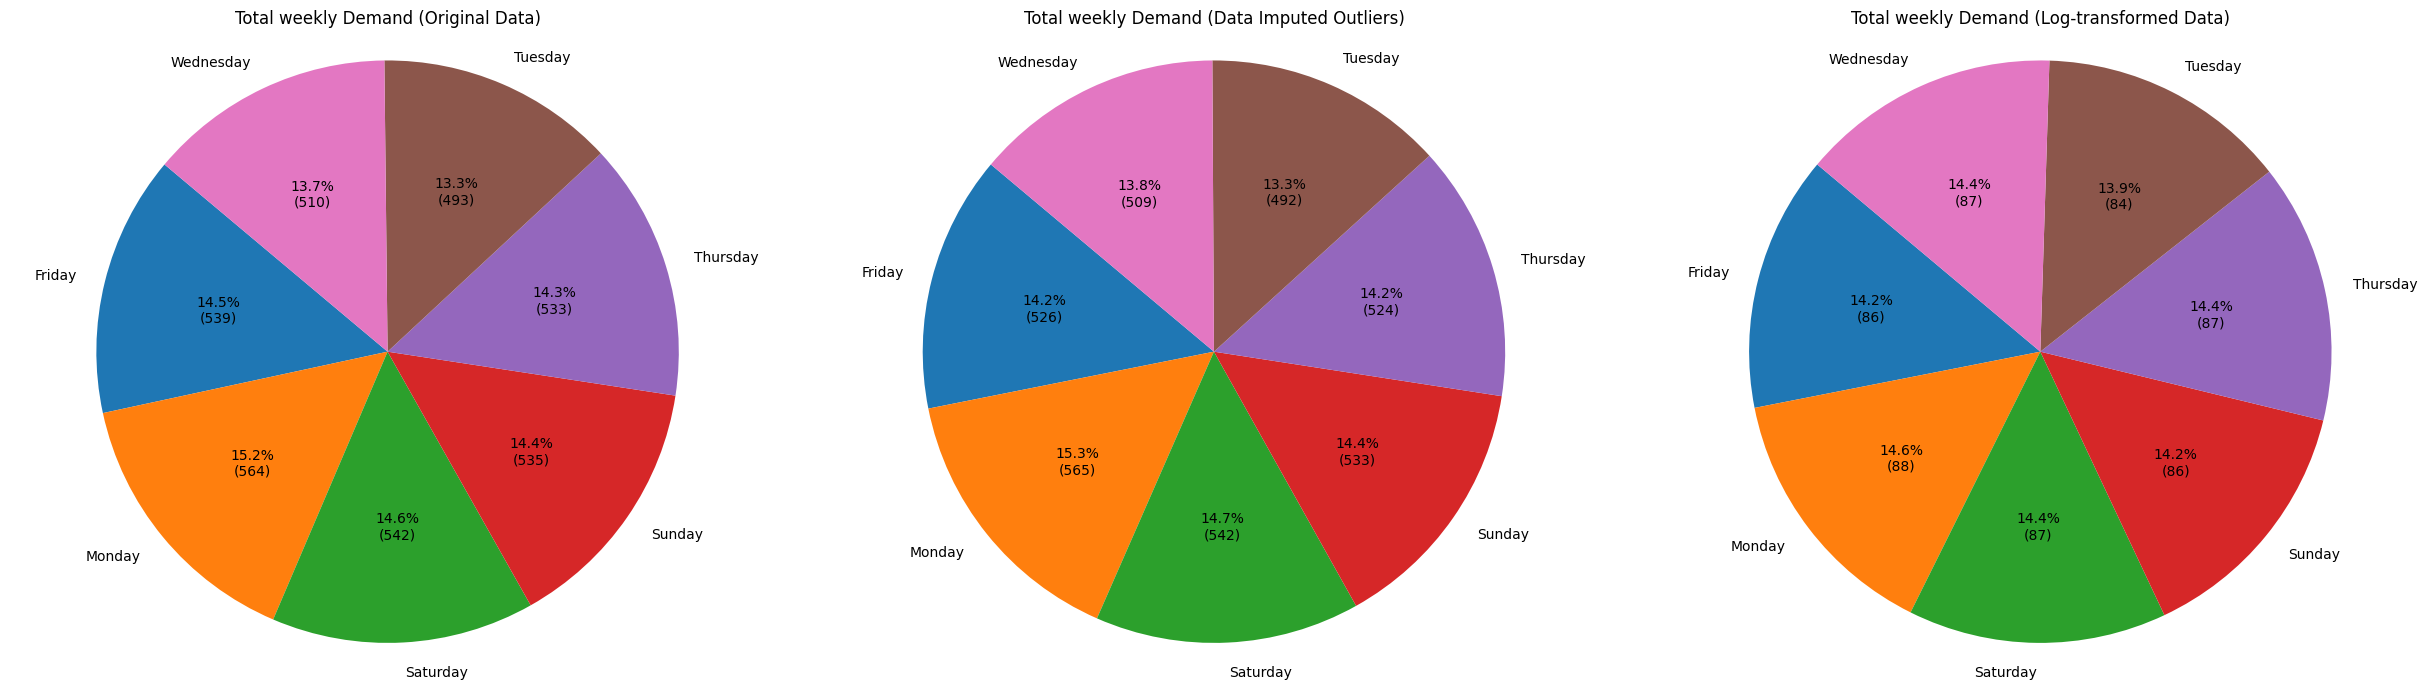

In [14]:
def plot_weekly_demand(df, x_col, y_col, title, ax):
    df1 = df.groupby(x_col)[y_col].sum().reset_index()
    df1 = df1.sort_values(by=x_col)
    labels = df1[x_col]
    sizes = df1[y_col]
    ax.pie(sizes, labels=labels, autopct=lambda pct: f'{pct:.1f}%\n({int(pct * sum(sizes) / 100)})', startangle=140)
    ax.set_title(title)
    ax.axis('equal')
    del df1

# Plotting side by side
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
plot_weekly_demand(df, 'DayOfWeek', 'Quantity', 'Total weekly Demand (Original Data)', axes[0])
plot_weekly_demand(df, 'DayOfWeek', 'imputed_Quantity', 'Total weekly Demand (Data Imputed Outliers)', axes[1])
plot_weekly_demand(df, 'DayOfWeek', 'log_Quantity', 'Total weekly Demand (Log-transformed Data)', axes[2])
plt.tight_layout()
plt.show()

As we can derive 2 conclusions from the total Product's quantity of each day:
* Monday accounts for the highest Product's quantity demand.
* Tuesdays accounts for the lowest Product's quantity demand.

***

#### 6.2 For Quantity, Clicks and Impressions Aggregated

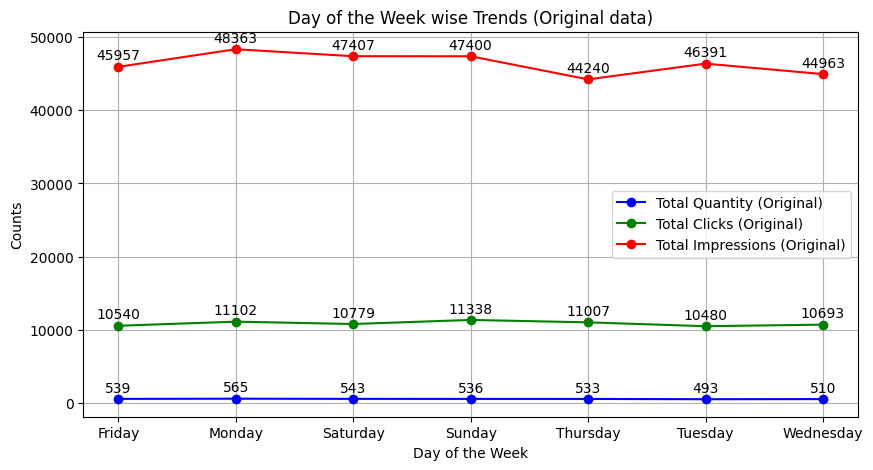

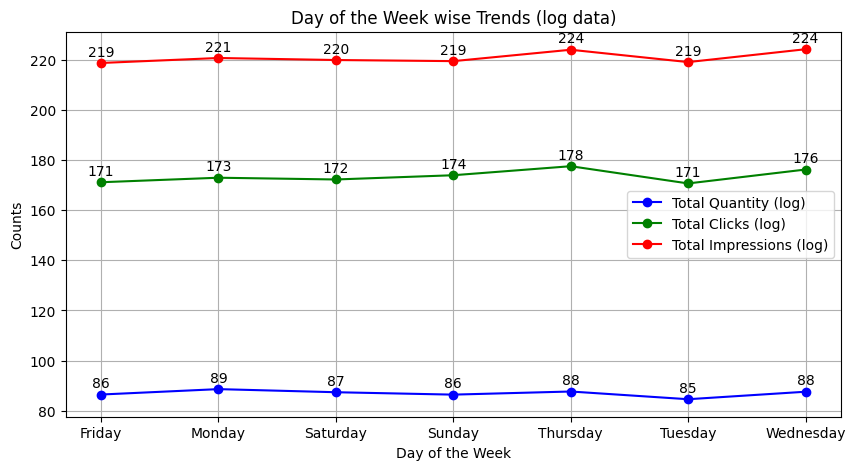

In [15]:
def plot_aggregated_weekly(df, x_col, y_cols, colors, labels, title):
    plt.figure(figsize=(10, 5))
    ax = plt.gca()

    for y_col, color, label in zip(y_cols, colors, labels):
        df1 = df.groupby(x_col)[y_col].sum().reset_index()
        df1 = df1.sort_values(by=x_col)
        plt.plot(df1[x_col], df1[y_col], marker='o', color=color, label=label)
        annotate_points(ax, df1[x_col], df1[y_col], df1[y_col])
        del df1
    plt.title(title)
    plt.xlabel('Day of the Week')
    plt.ylabel('Counts')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_aggregated_weekly(df, 'DayOfWeek', ['Quantity', 'Clicks', 'Impressions'], ['blue', 'green', 'red'], ['Total Quantity (Original)', 'Total Clicks (Original)', 'Total Impressions (Original)'], 'Day of the Week wise Trends (Original data)')
plot_aggregated_weekly(df, 'DayOfWeek', ['log_Quantity', 'log_Clicks', 'log_Impressions'], ['blue', 'green', 'red'], ['Total Quantity (log)', 'Total Clicks (log)', 'Total Impressions (log)'], 'Day of the Week wise Trends (log data)')

From the plot, we can derive following conclusions:
* <i>in original data plot</i>
    * Weekends (saturday, sundays) and monday have high impressions and clicks
    * Also, Thursday accounts for highest clicks
* <i>in log-transformed data plot</i> 
    * Wednesday and Thursday accounts for high impressions and clicks 